In [1]:
# Cell 1: Imports
import csv
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc


In [2]:
# Cell 2: Read CSV into DataFrame
df = pd.read_csv("./train.csv")

In [3]:
df.head(5)  # Display the first 5 rows of the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Columns to drop, which are : passengerId, Name, ticket, cabin
df = df.drop(columns=["PassengerId", "Ticket", "Cabin"])

In [6]:
df.head(5)  # Display the first 5 rows of the DataFrame

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# show the unique values in each column, and the count of each unique value
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Survived:
Survived
0    549
1    342
Name: count, dtype: int64


Unique values in Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Unique values in Name:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Unique values in Sex:
Sex
male      577
female    314
Name: count, dtype: int64


Unique values in Age:
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Len

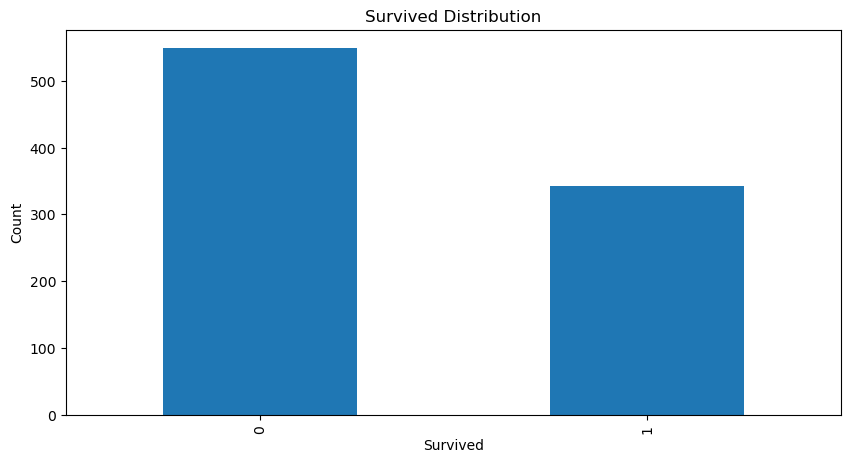

In [10]:
# Plot the survived column in a distribution
plt.figure(figsize=(10, 5))
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived Distribution')
plt.show()

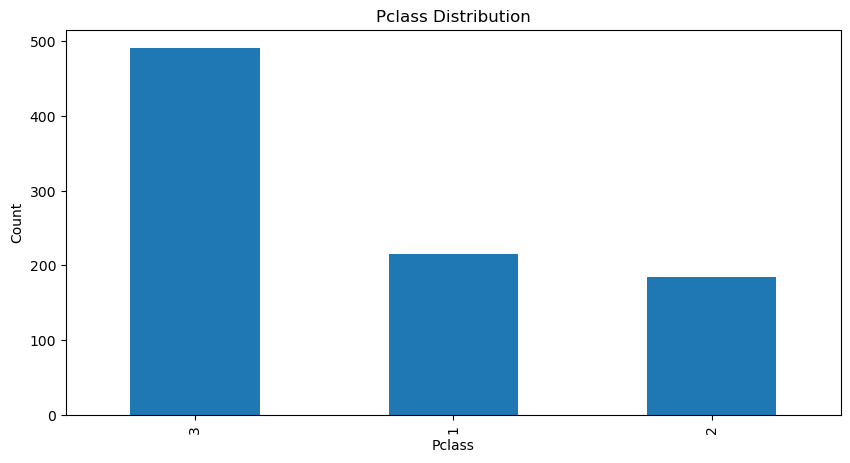

In [11]:
# Plot the distribution of the pclass column
plt.figure(figsize=(10, 5))
df['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass Distribution')
plt.show()

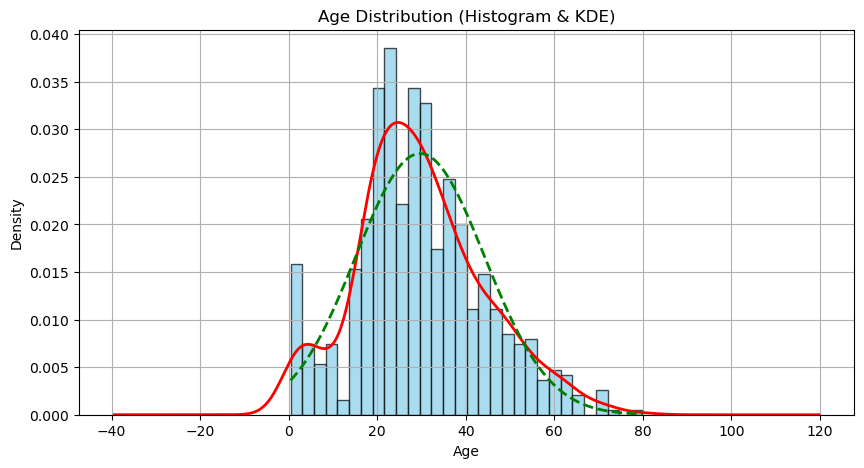

In [12]:
# Plot the distribution of the 'Age' column as a histogram to check for normality
plt.figure(figsize=(10, 5))
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Age'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['Age'].mean()
std = df['Age'].std()
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution (Histogram & KDE)')
plt.grid(True)
plt.show()

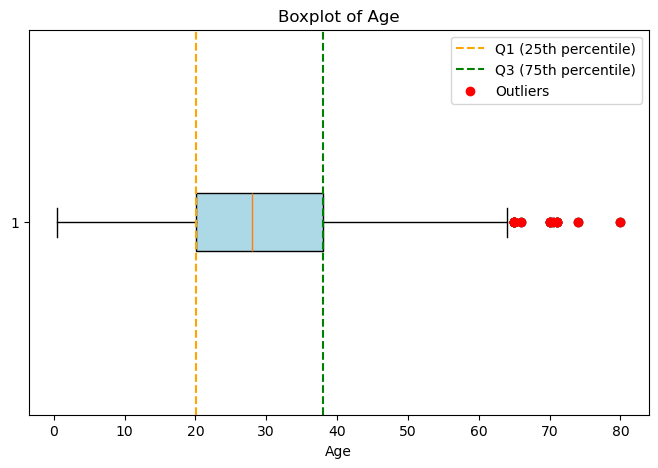

Outliers in Age:
     Survived  Pclass                                  Name   Sex   Age  \
33          0       2                 Wheadon, Mr. Edward H  male  66.0   
54          0       1        Ostby, Mr. Engelhart Cornelius  male  65.0   
96          0       1             Goldschmidt, Mr. George B  male  71.0   
116         0       3                  Connors, Mr. Patrick  male  70.5   
280         0       3                      Duane, Mr. Frank  male  65.0   
456         0       1             Millet, Mr. Francis Davis  male  65.0   
493         0       1               Artagaveytia, Mr. Ramon  male  71.0   
630         1       1  Barkworth, Mr. Algernon Henry Wilson  male  80.0   
672         0       2           Mitchell, Mr. Henry Michael  male  70.0   
745         0       1          Crosby, Capt. Edward Gifford  male  70.0   
851         0       3                   Svensson, Mr. Johan  male  74.0   

     SibSp  Parch     Fare Embarked  
33       0      0  10.5000        S  
54    

In [13]:
# Boxplot for the 'Age' column with Q1, Q3, and outliers
plt.figure(figsize=(8, 5))
box = plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Age')
plt.title('Boxplot of Age')

# Calculate Q1, Q3, and IQR
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# Plot Q1 and Q3 lines
plt.axvline(q1, color='orange', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q3, color='green', linestyle='--', label='Q3 (75th percentile)')

# Mark outliers
outliersA = df['Age'][(df['Age'] < (q1 - 1.5 * iqr)) | (df['Age'] > (q3 + 1.5 * iqr))]
plt.scatter(outliersA, np.ones_like(outliersA), color='red', label='Outliers', zorder=3)

plt.legend()
plt.show()
# print which ages and rows are the outliers
print("Outliers in Age:")
print(df[df['Age'].isin(outliersA)])


In [14]:
print("Before removal:")
print("Min Age:", df['Age'].min())
print("Max Age:", df['Age'].max())

# Remove outliers
df = df[~df['Age'].isin(outliersA)]

print("After removal:")
print("Min Age:", df['Age'].min())
print("Max Age:", df['Age'].max())
print("Outliers: ", outliersA)

Before removal:
Min Age: 0.42
Max Age: 80.0
After removal:
Min Age: 0.42
Max Age: 64.0
Outliers:  33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


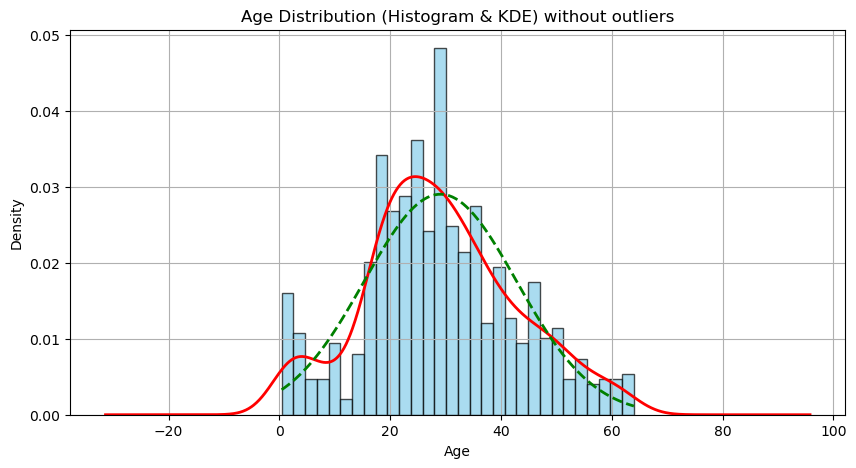

In [15]:
# Plot the distribution of the 'Age' column as a histogram to check for normality after
#outlier removal
plt.figure(figsize=(10, 5))
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Age'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve 
mean = df['Age'].mean()
std = df['Age'].std()
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution (Histogram & KDE) without outliers')
plt.grid(True)
plt.show()

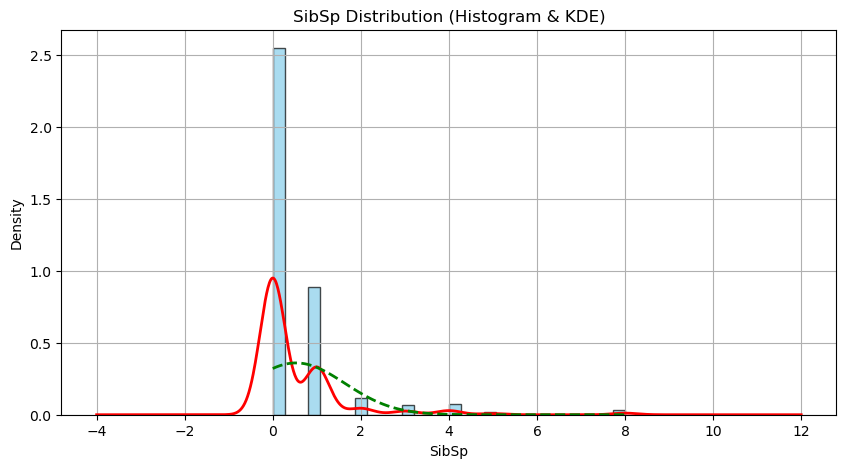

In [16]:
# Plot the distribution of the 'Sibsp' column as a histogram to check for normality
plt.figure(figsize=(10, 5))
df['SibSp'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['SibSp'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['SibSp'].mean()
std = df['SibSp'].std()
x = np.linspace(df['SibSp'].min(), df['SibSp'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('SibSp')
plt.ylabel('Density')
plt.title('SibSp Distribution (Histogram & KDE)')
plt.grid(True)
plt.show()

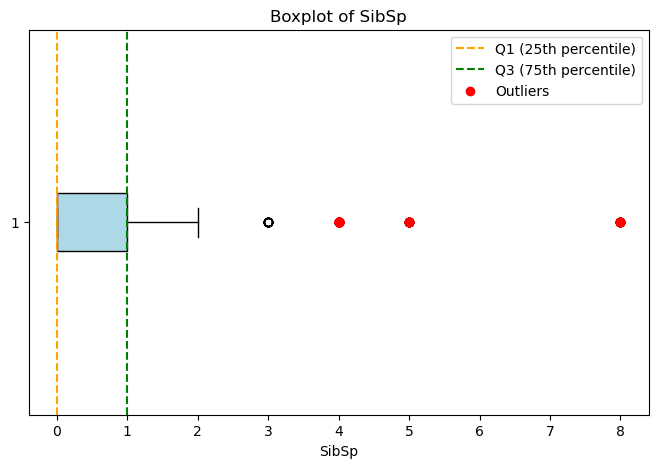

Outliers in SibSp:
     Survived  Pclass                                     Name     Sex   Age  \
16          0       3                     Rice, Master. Eugene    male   2.0   
50          0       3               Panula, Master. Juha Niilo    male   7.0   
59          0       3       Goodwin, Master. William Frederick    male  11.0   
68          1       3          Andersson, Miss. Erna Alexandra  female  17.0   
71          0       3               Goodwin, Miss. Lillian Amy  female  16.0   
119         0       3        Andersson, Miss. Ellis Anna Maria  female   2.0   
159         0       3               Sage, Master. Thomas Henry    male   NaN   
164         0       3             Panula, Master. Eino Viljami    male   1.0   
171         0       3                     Rice, Master. Arthur    male   4.0   
180         0       3             Sage, Miss. Constance Gladys  female   NaN   
182         0       3    Asplund, Master. Clarence Gustaf Hugo    male   9.0   
201         0       3

In [17]:
# Boxplot for the 'SibSp' column with Q1, Q3, and outliers
plt.figure(figsize=(8, 5))
box = plt.boxplot(df['SibSp'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('SibSp')
plt.title('Boxplot of SibSp')

# Calculate Q1, Q3, and IQR
q1 = df['SibSp'].quantile(0.25)
q3 = df['SibSp'].quantile(0.75)
iqr = q3 - q1

# Plot Q1 and Q3 lines
plt.axvline(q1, color='orange', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q3, color='green', linestyle='--', label='Q3 (75th percentile)')

# Mark outliers
outliersS = df['SibSp'][(df['SibSp'] < (q1 - 1.5 * iqr)) | (df['SibSp'] > (q3 + 2 * iqr))]
plt.scatter(outliersS, np.ones_like(outliersS), color='red', label='Outliers', zorder=3)

plt.legend()
plt.show()
# print which ages and rows are the outliers
print("Outliers in SibSp:")
print(df[df['SibSp'].isin(outliersS)])

In [18]:
print("Before removal:")
print("Min SibSp:", df['SibSp'].min())
print("Max SibSp:", df['SibSp'].max())

# Remove outliers
df = df[~df['SibSp'].isin(outliersS)]

print("After removal:")
print("Min SibSp:", df['SibSp'].min())
print("Max SibSp:", df['SibSp'].max())

Before removal:
Min SibSp: 0
Max SibSp: 8
After removal:
Min SibSp: 0
Max SibSp: 3


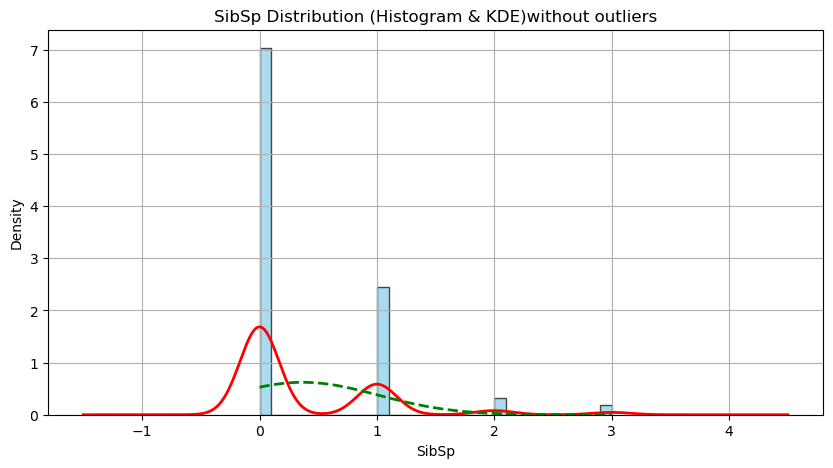

In [19]:
# Plot the distribution of the 'Sibsp' column as a histogram to check for normality without outliers
plt.figure(figsize=(10, 5))
df['SibSp'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['SibSp'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['SibSp'].mean()
std = df['SibSp'].std()
x = np.linspace(df['SibSp'].min(), df['SibSp'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color = 'green', linestyle ='dashed', linewidth = 2)
plt.xlabel('SibSp')
plt.ylabel('Density')
plt.title('SibSp Distribution (Histogram & KDE)without outliers')
plt.grid(True)
plt.show()

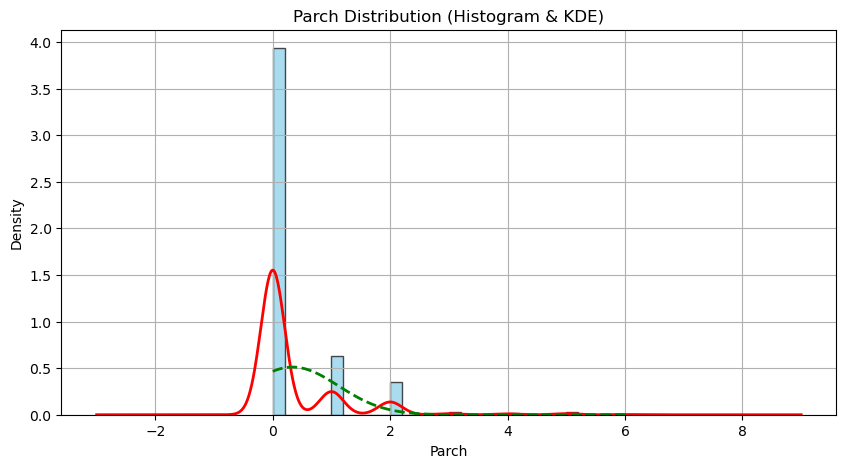

In [20]:
# Plot the distribution of the 'Parch' column as a histogram to check for normality
plt.figure(figsize=(10, 5))
df['Parch'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Parch'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['Parch'].mean()
std = df['Parch'].std()
x = np.linspace(df['Parch'].min(), df['Parch'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Parch')
plt.ylabel('Density')
plt.title('Parch Distribution (Histogram & KDE)')
plt.grid(True)
plt.show()

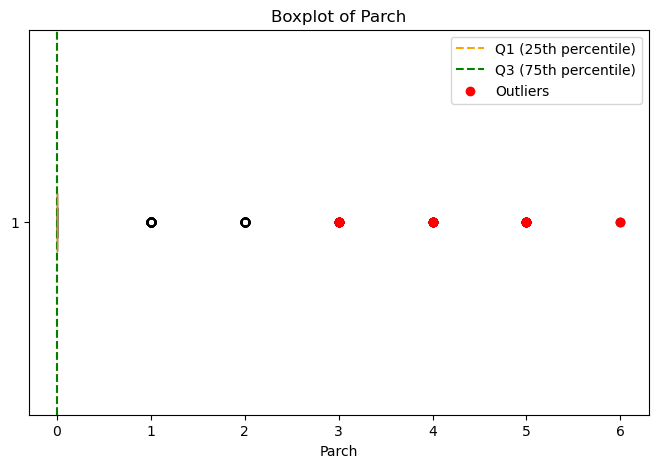

Outliers in Parch:
     Survived  Pclass                                               Name  \
13          0       3                        Andersson, Mr. Anders Johan   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
86          0       3                             Ford, Mr. William Neal   
167         0       3    Skoog, Mrs. William (Anna Bernhardina Karlsson)   
360         0       3                                 Skoog, Mr. Wilhelm   
437         1       2              Richards, Mrs. Sidney (Emily Hocking)   
438         0       1                                  Fortune, Mr. Mark   
567         0       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)   
610         0       3  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
638         0       3             Panula, Mrs. Juha (Maria Emilia Ojala)   
678         0       3            Goodwin, Mrs. Frederick (Augusta Tyler)   
736         0       3            Ford, Mrs. Edward (Margaret Ann Wats

In [21]:
# Boxplot for the 'Parch' column with Q1, Q3, and outliers
plt.figure(figsize=(8, 5))
box = plt.boxplot(df['Parch'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Parch')
plt.title('Boxplot of Parch')

# Calculate Q1, Q3, and IQR
q1 = df['Parch'].quantile(0.25)
q3 = df['Parch'].quantile(0.75)
iqr = q3 - q1

# Plot Q1 and Q3 lines
plt.axvline(q1, color='orange', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q3, color='green', linestyle='--', label='Q3 (75th percentile)')

# Mark outliers
outliersP = df['Parch'][(df['Parch'] < (q1 - 1.5 * iqr)) | (df['Parch'] > (q3 + 1.5 * (iqr+1.5)))]
plt.scatter(outliersP, np.ones_like(outliersP), color='red', label='Outliers', zorder=3)

plt.legend()
plt.show()
# print which ages and rows are the outliers
print("Outliers in Parch:")
print(df[df['Parch'].isin(outliersP)])

In [22]:
print("Before removal:")
print("Min Parch:", df['Parch'].min())
print("Max Parch:", df['Parch'].max())

# Remove outliers
df = df[~df['Parch'].isin(outliersP)]

print("After removal:")
print("Min Parch:", df['Parch'].min())
print("Max Parch:", df['Parch'].max())

Before removal:
Min Parch: 0
Max Parch: 6
After removal:
Min Parch: 0
Max Parch: 2


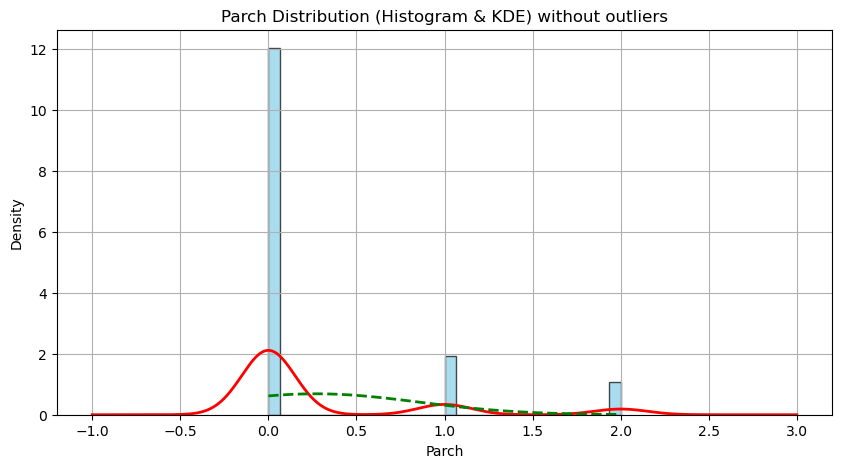

In [23]:
# Plot the distribution of the 'Parch' column as a histogram to check for normality without outliers
plt.figure(figsize=(10, 5))
df['Parch'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Parch'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['Parch'].mean()
std = df['Parch'].std()
x = np.linspace(df['Parch'].min(), df['Parch'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Parch')
plt.ylabel('Density')
plt.title('Parch Distribution (Histogram & KDE) without outliers')
plt.grid(True)
plt.show()

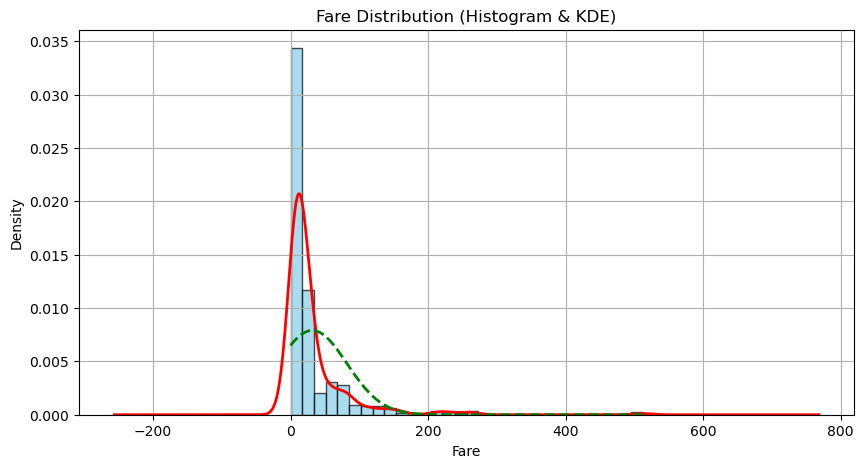

In [24]:
# Plot the distribution of the 'Fare' column as a histogram to check for normality
plt.figure(figsize=(10, 5))
df['Fare'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Fare'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['Fare'].mean()
std = df['Fare'].std()
x = np.linspace(df['Fare'].min(), df['Fare'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution (Histogram & KDE)')
plt.grid(True)
plt.show()

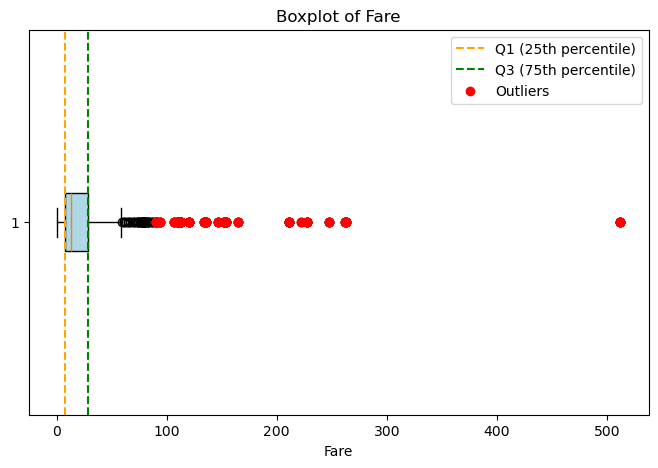

Outliers in Fare:
     Survived  Pclass                                               Name  \
27          0       1                     Fortune, Mr. Charles Alexander   
31          1       1     Spencer, Mrs. William Augustus (Marie Eugenie)   
88          1       1                         Fortune, Miss. Mabel Helen   
118         0       1                           Baxter, Mr. Quigg Edmond   
195         1       1                               Lurette, Miss. Elise   
215         1       1                            Newell, Miss. Madeleine   
224         1       1                       Hoyt, Mr. Frederick Maxfield   
245         0       1                        Minahan, Dr. William Edward   
258         1       1                                   Ward, Miss. Anna   
268         1       1      Graham, Mrs. William Thompson (Edith Junkins)   
269         1       1                             Bissette, Miss. Amelia   
291         1       1            Bishop, Mrs. Dickinson H (Helen Walto

In [25]:
# Boxplot for the 'Fare' column with Q1, Q3, and outliers
plt.figure(figsize=(8, 5))
box = plt.boxplot(df['Fare'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Fare')
plt.title('Boxplot of Fare')

# Calculate Q1, Q3, and IQR
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1

# Plot Q1 and Q3 lines
plt.axvline(q1, color='orange', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q3, color='green', linestyle='--', label='Q3 (75th percentile)')

# Mark outliers
outliersF = df['Fare'][(df['Fare'] < (q1 - 1.5 * iqr)) | (df['Fare'] > (q3 + 3 * iqr))]
plt.scatter(outliersF, np.ones_like(outliersF), color='red', label='Outliers', zorder=3)

plt.legend()
plt.show()
# print which ages and rows are the outliers
print("Outliers in Fare:")
print(df[df['Fare'].isin(outliersF)])

In [26]:
print("Before removal:")
print("Min Fare:", df['Fare'].min())
print("Max Fare:", df['Fare'].max())

# Remove outliers
df = df[~df['Fare'].isin(outliersF)]

print("After removal:")
print("Min Fare:", df['Fare'].min())
print("Max Fare:", df['Fare'].max())

Before removal:
Min Fare: 0.0
Max Fare: 512.3292
After removal:
Min Fare: 0.0
Max Fare: 89.1042


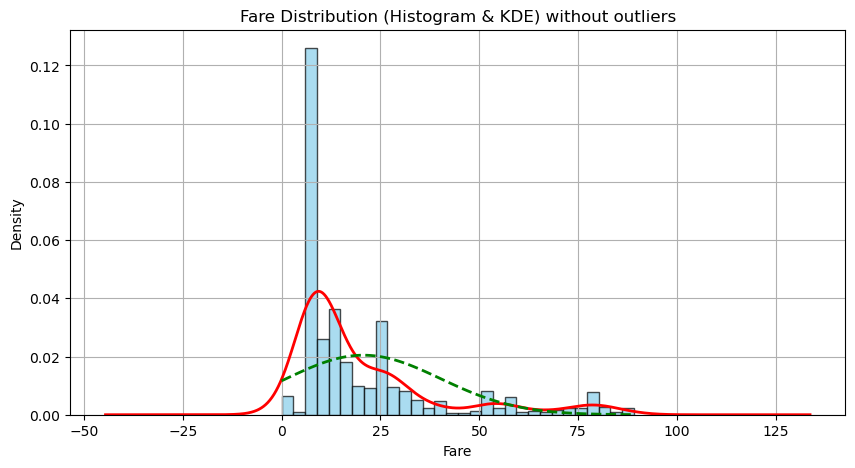

In [27]:
# Plot the distribution of the 'Fare' column as a histogram to check for normality without outliers
plt.figure(figsize=(10, 5))
df['Fare'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Fare'].plot(kind='kde', color='red', linewidth=2)
# add normal distribution curve
mean = df['Fare'].mean()
std = df['Fare'].std()
x = np.linspace(df['Fare'].min(), df['Fare'].max(), 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution (Histogram & KDE) without outliers')
plt.grid(True)
plt.show()

In [28]:
# Cell 5: assign columns to X and y
# Features and target variable
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']


In [29]:
# Cell 4: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      775 non-null    int64  
 1   Name        775 non-null    object 
 2   Age         610 non-null    float64
 3   SibSp       775 non-null    int64  
 4   Parch       775 non-null    int64  
 5   Fare        775 non-null    float64
 6   Sex_female  775 non-null    bool   
 7   Sex_male    775 non-null    bool   
 8   Embarked_C  775 non-null    bool   
 9   Embarked_Q  775 non-null    bool   
 10  Embarked_S  775 non-null    bool   
dtypes: bool(5), float64(2), int64(3), object(1)
memory usage: 46.2+ KB


In [30]:
# Cell 5: Add Age_missing column
df['Age_missing'] = df['Age'].isnull().astype(int)

In [31]:
# Cell 6: Extract and clean Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Dona', 'Sir', 'Lady', 'Countess'], 'Rare')

In [32]:
# Cell 7: Impute missing Age values by Title median
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [33]:
# Cell 8: Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
X.drop('Name', axis=1, inplace=True)  # modifies X in place

In [34]:
# Start splitting data into training , validation and training sets    
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15,shuffle=True, random_state=423, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.176471,shuffle=True, random_state=423, stratify=y_temp)

In [35]:
# Create a pipeline with StandardScaler and RandomForestClassifier to predict the data
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=432, n_estimators=100, max_depth=10))
pipeline.fit(X_train, y_train)    
y_predict = pipeline.predict(X_test)

In [36]:
#accuracy, f1 score, recall, precision, confusion matrix, roc curve, auc
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)    
precision = precision_score(y_test, y_predict)

print("Accuracy: %.3f" % accuracy)
print("F1 Score: %.3f" % f1)    
print("Recall: %.3f" % recall)
print("Precision: %.3f" % precision)

Accuracy: 0.863
F1 Score: 0.789
Recall: 0.698
Precision: 0.909
